In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Name Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


# Reshape and Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32) 



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


MLP = Sequential()
MLP.add(Flatten(input_shape=(32, 32, 3)))
MLP.add(Dense(1024, activation='relu'))
MLP.add(Dense(2048, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(512, activation='relu'))
MLP.add(Dropout(0.3))
MLP.add(Dense(10, activation='softmax')) 

optimizer = Adam(learning_rate=0.001)
MLP.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    shear_range=0.5,
    zoom_range=0.5
)


datagen.fit(x_train)

history = MLP.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

test_loss, test_accuracy = MLP.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")


c:\Users\kkate\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.2579 - loss: 2.0865 - val_accuracy: 0.3631 - val_loss: 1.7654
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.3657 - loss: 1.7569 - val_accuracy: 0.3942 - val_loss: 1.6625
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.3962 - loss: 1.6814 - val_accuracy: 0.4265 - val_loss: 1.6062
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.4166 - loss: 1.6344 - val_accuracy: 0.4101 - val_loss: 1.6191
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4240 - loss: 1.6042 - val_accuracy: 0.4067 - val_loss: 1.6169
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4374 - loss: 1.5710 - val_accuracy: 0.4577 - val_loss: 1.5109
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.4460 - loss: 1.5494 - val_accuracy: 0.4540 - val_loss: 1.5360
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4578 - loss: 1.5195 - 

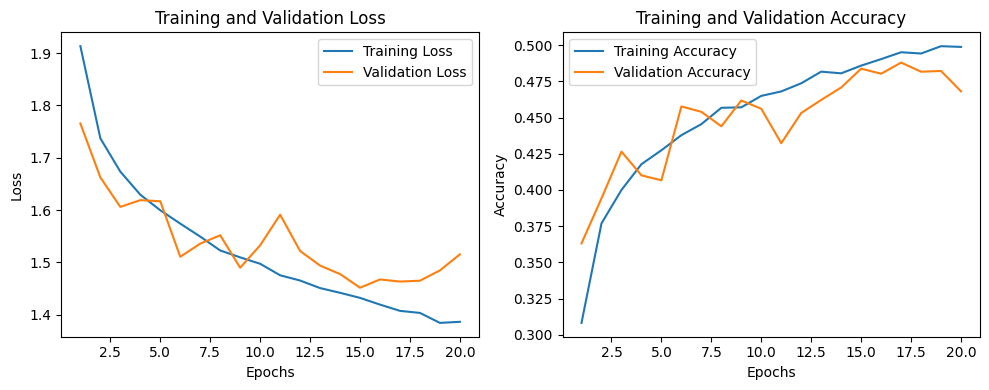

In [ ]:
import matplotlib.pyplot as plt


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()


**Print Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


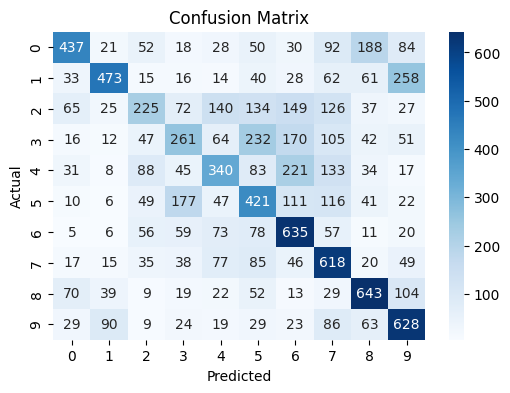


Classification Success Rate per Class:
Class 0: 43.70%
Class 1: 47.30%
Class 2: 22.50%
Class 3: 26.10%
Class 4: 34.00%
Class 5: 42.10%
Class 6: 63.50%
Class 7: 61.80%
Class 8: 64.30%
Class 9: 62.80%


In [39]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = MLP.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_totals = cm.sum(axis=1)
class_correct = np.diag(cm)
class_accuracy = class_correct / class_totals * 100
print("\nClassification Success Rate per Class:")
for i, accuracy in enumerate(class_accuracy):
    print(f"Class {i}: {accuracy:.2f}%")